In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score#KFold
from sklearn.metrics import accuracy_score

In [4]:
model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=5)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=5)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()

(0.9173886042539978,
 0.01060820476648569,
 0.9578326346840553,
 0.026820988500138258)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=5)
accuracy.mean(), accuracy.std()

(0.9648501785437043, 0.016644030069711022)

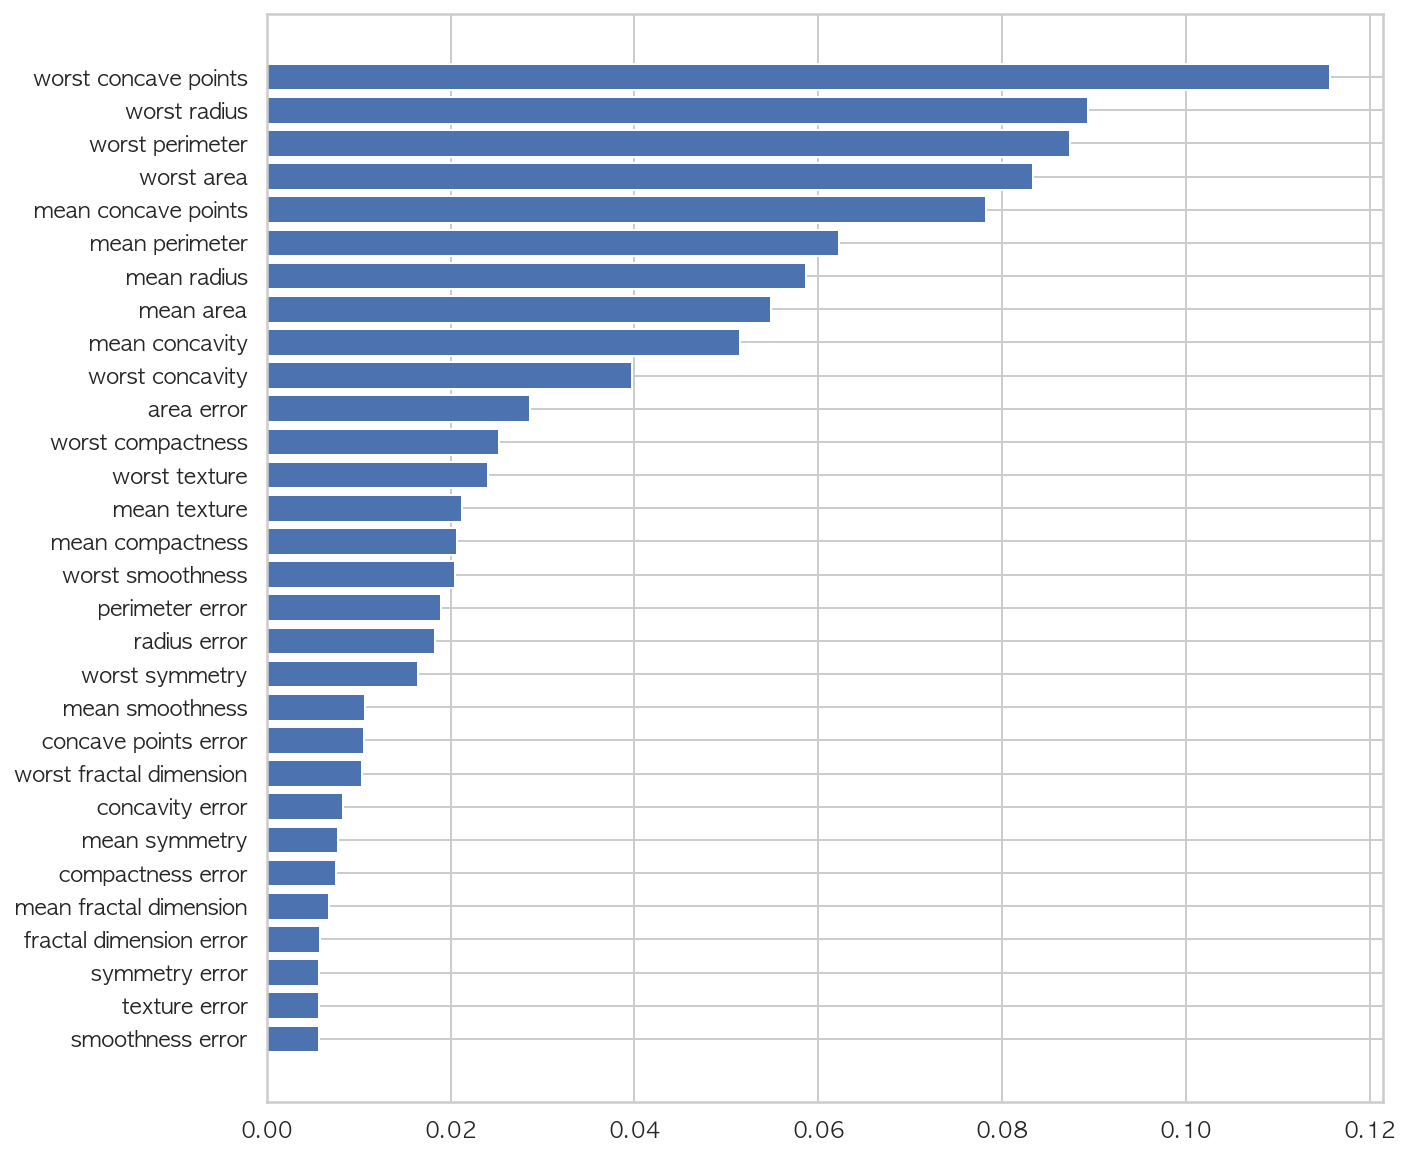

In [6]:
idx = np.argsort(forest.feature_importances_)
names = breast_cancer.feature_names[idx]
values = forest.feature_importances_[idx]

plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


mean_test_accuracy = []
for n in np.arange(1,1000, 100):
    model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=n)
    mean_test_accuracy.append(cross_val_score(model1,X,y, cv=5).mean())

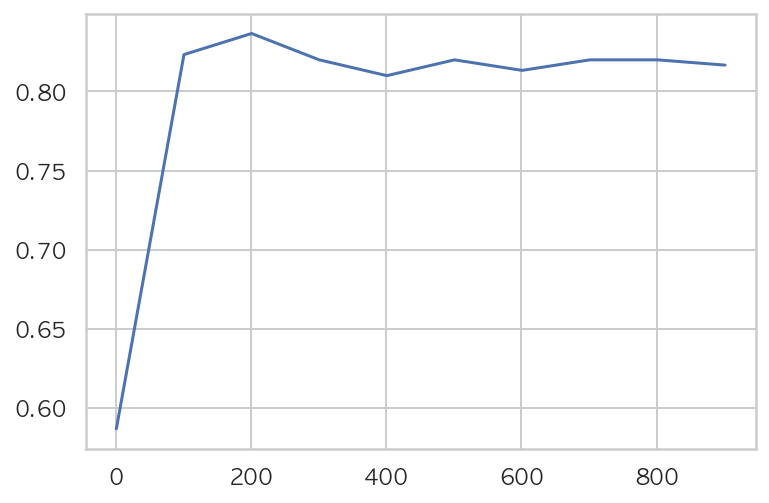

In [17]:
plt.plot(np.arange(1,1000, 100), mean_test_accuracy)
plt.show()